# Projet 05 : Analyse de  base

---

## <font color=blue>Sommaire</font>

[1. Analyse de base : 4 variables](#1_0)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1. Classification hiérarchique](#1_1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2. Analyse des résultats](#1_2)  
  
[2. Analyse de base : 5 variables - 5 clusters](#2_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Estimation des données manquantes](#2_1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Classification hiérarchique](#2_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Analyse des résultats](#2_3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Visualisation des résultats par une ACP](#2_4)  
  
[3. Analyse de base : 5 variables - 6 clusters](#3_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Classification hiérarchique](#3_1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Analyse des résultats](#3_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Visualisation des résultats par une ACP](#3_3)  
  
[4. Analyse de base : 5 variables - 11 clusters](#4_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Classification hiérarchique](#4_1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Analyse des résultats](#4_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4.3. Visualisation des résultats par une ACP](#4_3)  
  
[5. Sauvegarde des données](#5_0)  
  
  

**Importation des librairies et des données**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sf_classification_acp as sfca
import sf_stats_inferentielles as sfsi

---

<a id="1_0"></a>

## <font color=blue>1. Analyse de base : 4 variables</font>

In [2]:
data_primaire_2013 = pd.read_csv("projet05_data_primaire_2013.csv")
data_secondaire_2013 = pd.read_csv("projet05_data_secondaire_2013.csv")
data_primaire_2013.head()

,country_code,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_balance_commerciale_tonnes,poultry_food_supply_tonnes,poultry_food_proportion_import,taux_urbanisation,political_stability,gdp_per_capita_usd,income_variability,doing_business_score
0,1,Arménie,-0.041188,0.480342,90.04,2928.0,0.104277,-32000.0,40000.0,0.800000,0.647824,0.11,3843.590751,2.698087,76.30
1,2,Afghanistan,0.375760,0.209785,58.25,2089.0,0.071195,-48000.0,75000.0,0.640000,0.249087,-2.52,681.034215,1.531833,48.94
2,3,Albanie,-0.061725,0.533297,111.42,3193.0,0.083137,-25000.0,42000.0,0.595238,0.602075,0.09,4376.970549,0.689007,75.37
3,4,Algérie,0.183161,0.271749,91.96,3296.0,0.091236,-3000.0,291000.0,0.010309,0.710867,-1.20,5471.123389,0.424757,56.92
4,7,Angola,0.428216,0.321341,57.26,2473.0,0.317391,-342000.0,372000.0,0.919355,0.350915,-0.39,5258.408495,1.334412,44.43


Je commence mon analyse en utilisant les 4 critères de base fournis par ma direction : croissance de la population, proportion de protéines d'origine animale, disponibilité alimentaire en quantité de protéines et disponibilité alimentaire en calories.

In [3]:
data = data_primaire_2013.loc[:,"croissance_population":"food_supply_kcal_capita_day"].copy()
data.index = data_primaire_2013.country
data.head()

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day
country,,,,
Arménie,-0.041188,0.480342,90.04,2928.0
Afghanistan,0.375760,0.209785,58.25,2089.0
Albanie,-0.061725,0.533297,111.42,3193.0
Algérie,0.183161,0.271749,91.96,3296.0
Angola,0.428216,0.321341,57.26,2473.0


In [4]:
data.isna().sum()

croissance_population             0
food_proportion_animal_protein    0
food_protein_g_capita_day         0
food_supply_kcal_capita_day       0
dtype: int64

Il n'y a pas de données manquantes, ce qui est une très bonne chose pour notre analyse.

<a id="1_1"></a>

### <font color=blue>1.1. Classification hiérarchique</font>

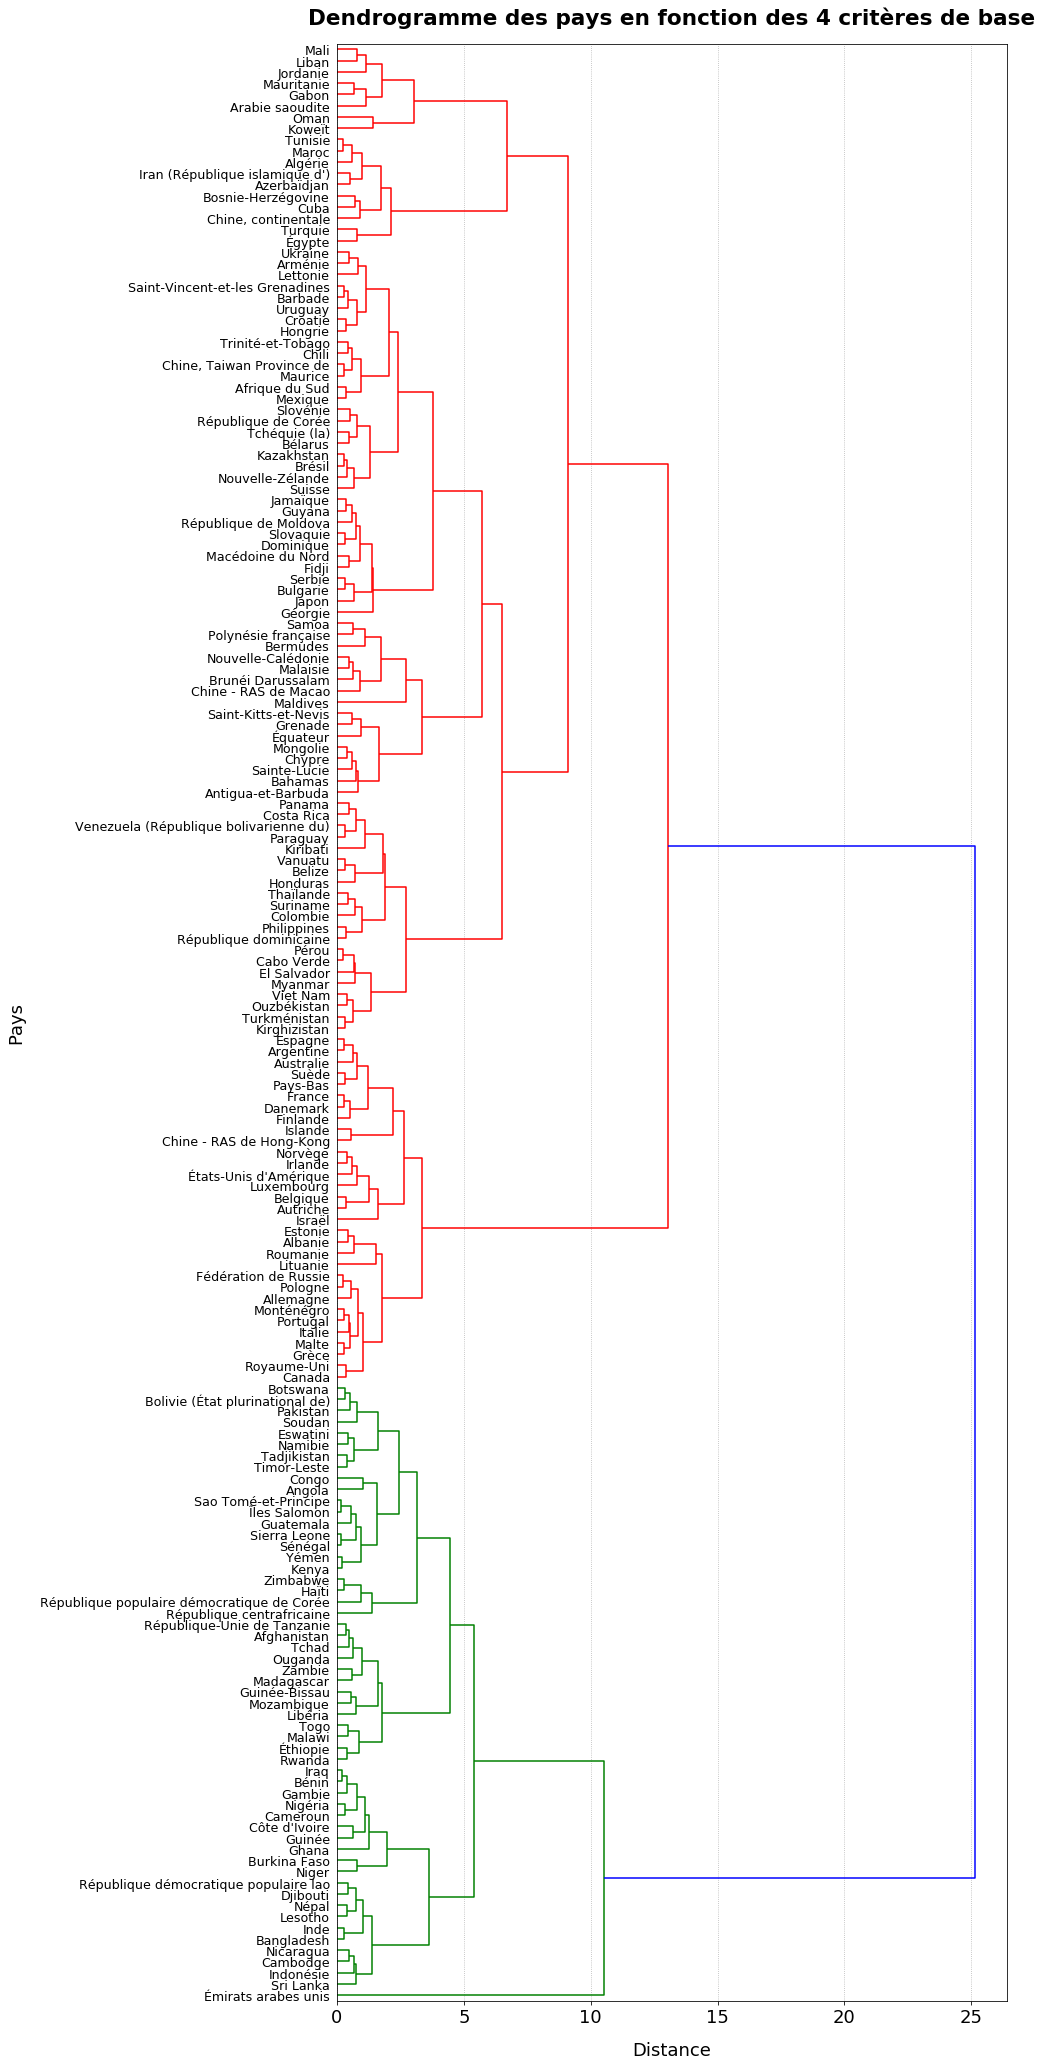

In [5]:
dendro1 = sfca.ClassificationHierarchique(data)
fig, ax = dendro1.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 4 critères de base", clusters_label_title="Pays", orientation='right', figsize=(12,36), mult_clusters_label_size=0.7)

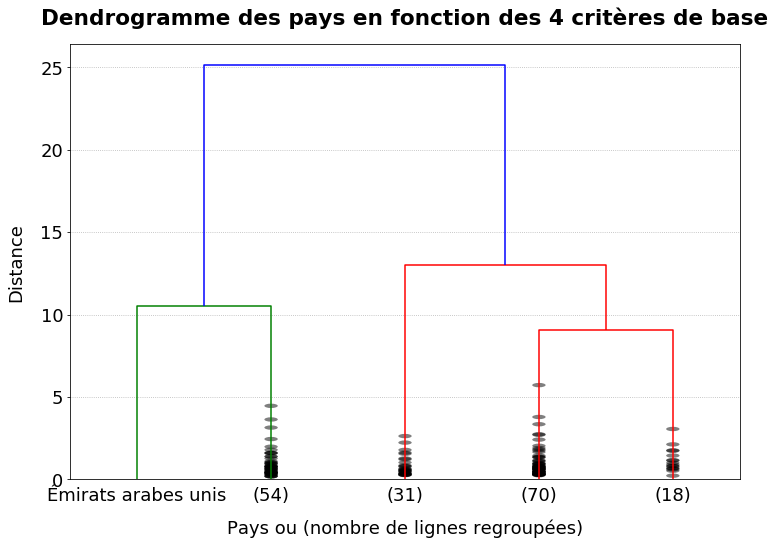

In [6]:
# pour l'instant, je réalise 5 clusters comme demandé dans l'énoncé
n_clusters = 5
dendro1.define_n_clusters(n_clusters)
fig, ax = dendro1.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 4 critères de base", clusters_label_title="Pays", n_clusters=n_clusters)

In [7]:
dendro1.df_centroids

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,nombre_individus
cluster 1,0.261090,0.243376,59.899259,2378.388889,54
cluster 2,1.406848,0.398547,104.630000,3280.000000,1
cluster 3,0.055661,0.597176,110.288065,3424.516129,31
cluster 4,0.090746,0.512729,81.922857,2857.371429,70
cluster 5,0.259034,0.356313,92.499444,3212.055556,18


In [8]:
dendro1.df_data_clusters[dendro1.df_data_clusters.cluster==2]

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,cluster
country,,,,,
Émirats arabes unis,1.406848,0.398547,104.63,3280.0,2


<a id="1_2"></a>

### <font color=blue>1.2. Analyse des résultats</font>

Les valeurs moyennes pour chaque groupe permettent de comprendre leurs caractéristiques :  
- Le groupe 1 regroupe des pays dont la population croît dynamiquement, consomme peu de protéines d'origine animale, et dont les apports en protéines et en calories sont modérés. Je pense que ce sont des pays sous-développés ;  
- Le groupe 2 ne comporte qu'un pays, les Emirats Arabes Unis, caractérisé par une très forte progression démographique, une disponibilité alimentaire en protéines et en calories élévée, qui provient essentiellement des végétaux ;  
- Le groupe 3 regroupe des pays dont la population croît peu, consomme en majorité des protéines d'origine animale, et bénéficie d'apports en protéines et en calories très élevés. J'estime que ce sont des pays développés ;  
- Le groupe 4 regroupe des pays dont la population croît peu, consomme autant de protéines d'origine animale que d'origine végétale, mais ne bénéficient pas d'apports élevés en protéines et en calories. Je pense que ce sont des pays en voie de développement mais à la croissance démographique faible et avec un mode de vie calqué sur le mode de vie occidental ;  
- Le groupe 5 regroupe des pays dont la population croît dynamiquement, consomme environ un tiers de protéines d'orogine animale, et dont les apports en protéines et en calories sont élevés. Je pense qu'il s'agit de pays en fort développement aussi bien démographique qu'économique.

Il est difficile de cibler un groupe de pays avec ces seuls éléments. Je relance une classification en ajoutant le PIB par habitant, pour ajouter une notion de développement économique et de pouvoir d'achat. Je commence par vérifier s'il y a des valeurs manquantes dans les PIB par habitant.

---

<a id="2_0"></a>

## <font color=blue>2. Analyse de base : 5 variables - 5 clusters</font>

In [9]:
data = data_primaire_2013.loc[:,"croissance_population":"food_supply_kcal_capita_day"].copy()
data["gdp_per_capita_usd"] = data_primaire_2013.gdp_per_capita_usd
data.index = data_primaire_2013.country
data.isna().sum()

croissance_population             0
food_proportion_animal_protein    0
food_protein_g_capita_day         0
food_supply_kcal_capita_day       0
gdp_per_capita_usd                1
dtype: int64

<a id="2_1"></a>

### <font color=blue>2.1. Estimation des données manquantes</font>

Il manque le PIB par habitant pour un pays. Je cherche quel est ce pays et j'estime la valeur de son PIB par habitant.

In [10]:
data_primaire_2013[data_primaire_2013.gdp_per_capita_usd.isna()]

,country_code,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_balance_commerciale_tonnes,poultry_food_supply_tonnes,poultry_food_proportion_import,taux_urbanisation,political_stability,gdp_per_capita_usd,income_variability,doing_business_score
147,214,"Chine, Taiwan Province de",0.046333,0.484622,89.74,2998.0,0.245804,-109000.0,750000.0,0.154667,0.76004,0.87,NaN,0.533689,83.56


Je vérifie le cluster dans lequel Taïwan se trouve dans ma première classification. Puis j'ajoute le PIB par habitant moyen de ce cluster, qui regroupe des pays similaires à Taïwan.

In [11]:
index_taiwan = data_primaire_2013[data_primaire_2013.country_code==214].index
cluster_taiwan = dendro1.df_data_clusters.loc["Chine, Taiwan Province de"].cluster
liste_pays_cluster_taiwan = dendro1.df_data_clusters[dendro1.df_data_clusters.cluster==cluster_taiwan].index
gdp_moyen = data_primaire_2013[data_primaire_2013.country.isin(liste_pays_cluster_taiwan)].gdp_per_capita_usd.mean()

In [12]:
data_primaire_2013.loc[index_taiwan,"gdp_per_capita_usd"] = gdp_moyen

In [13]:
data = data_primaire_2013.loc[:,"croissance_population":"food_supply_kcal_capita_day"].copy()
data["gdp_per_capita_usd"] = data_primaire_2013.gdp_per_capita_usd
data.index = data_primaire_2013.country
data.head()

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,gdp_per_capita_usd
country,,,,,
Arménie,-0.041188,0.480342,90.04,2928.0,3843.590751
Afghanistan,0.375760,0.209785,58.25,2089.0,681.034215
Albanie,-0.061725,0.533297,111.42,3193.0,4376.970549
Algérie,0.183161,0.271749,91.96,3296.0,5471.123389
Angola,0.428216,0.321341,57.26,2473.0,5258.408495


In [14]:
data.isna().sum()

croissance_population             0
food_proportion_animal_protein    0
food_protein_g_capita_day         0
food_supply_kcal_capita_day       0
gdp_per_capita_usd                0
dtype: int64

Je n'ai plus de données manquantes. Je peux continuer mon analyse.

<a id="2_2"></a>

### <font color=blue>2.2. Classification hiérarchique</font>

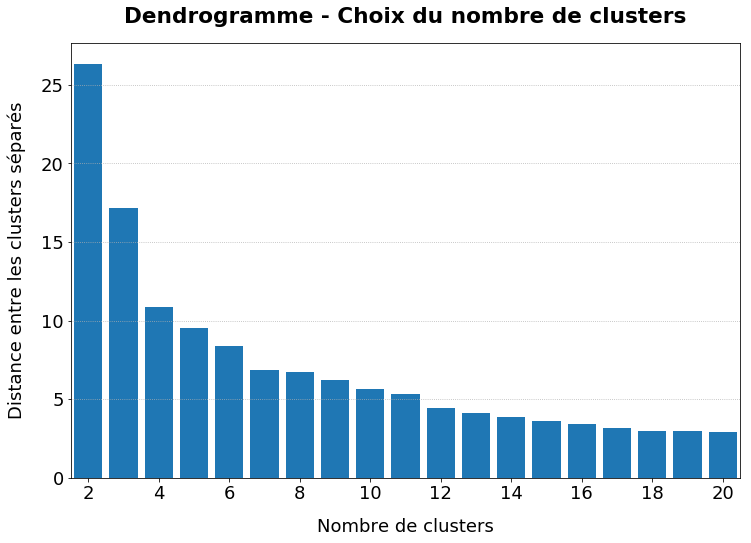

In [15]:
dendro2 = sfca.ClassificationHierarchique(data)
fig, ax = dendro2.graphique_choix_nclusters(20)

En me basant sur la distance entre les clusters séparés, le nombre de 6 clusters me paraît un bon choix. Cela reste un nombre raisonnable de clusters, et la distance entre les clusters séparés chute brutalement avec la 7ème composante. Pour commencer, je vais me baser sur 5 clusters, comme proposé par l'énoncé.  
Ce graphique justifie également de mener une analyse avec 11 clusters si l'on souhaite disposer d'une classification plus fine. Choisir 11 clusters permet de conserver tous les niveaux qui séparent des clusters dont la distance est supérieure à 5.

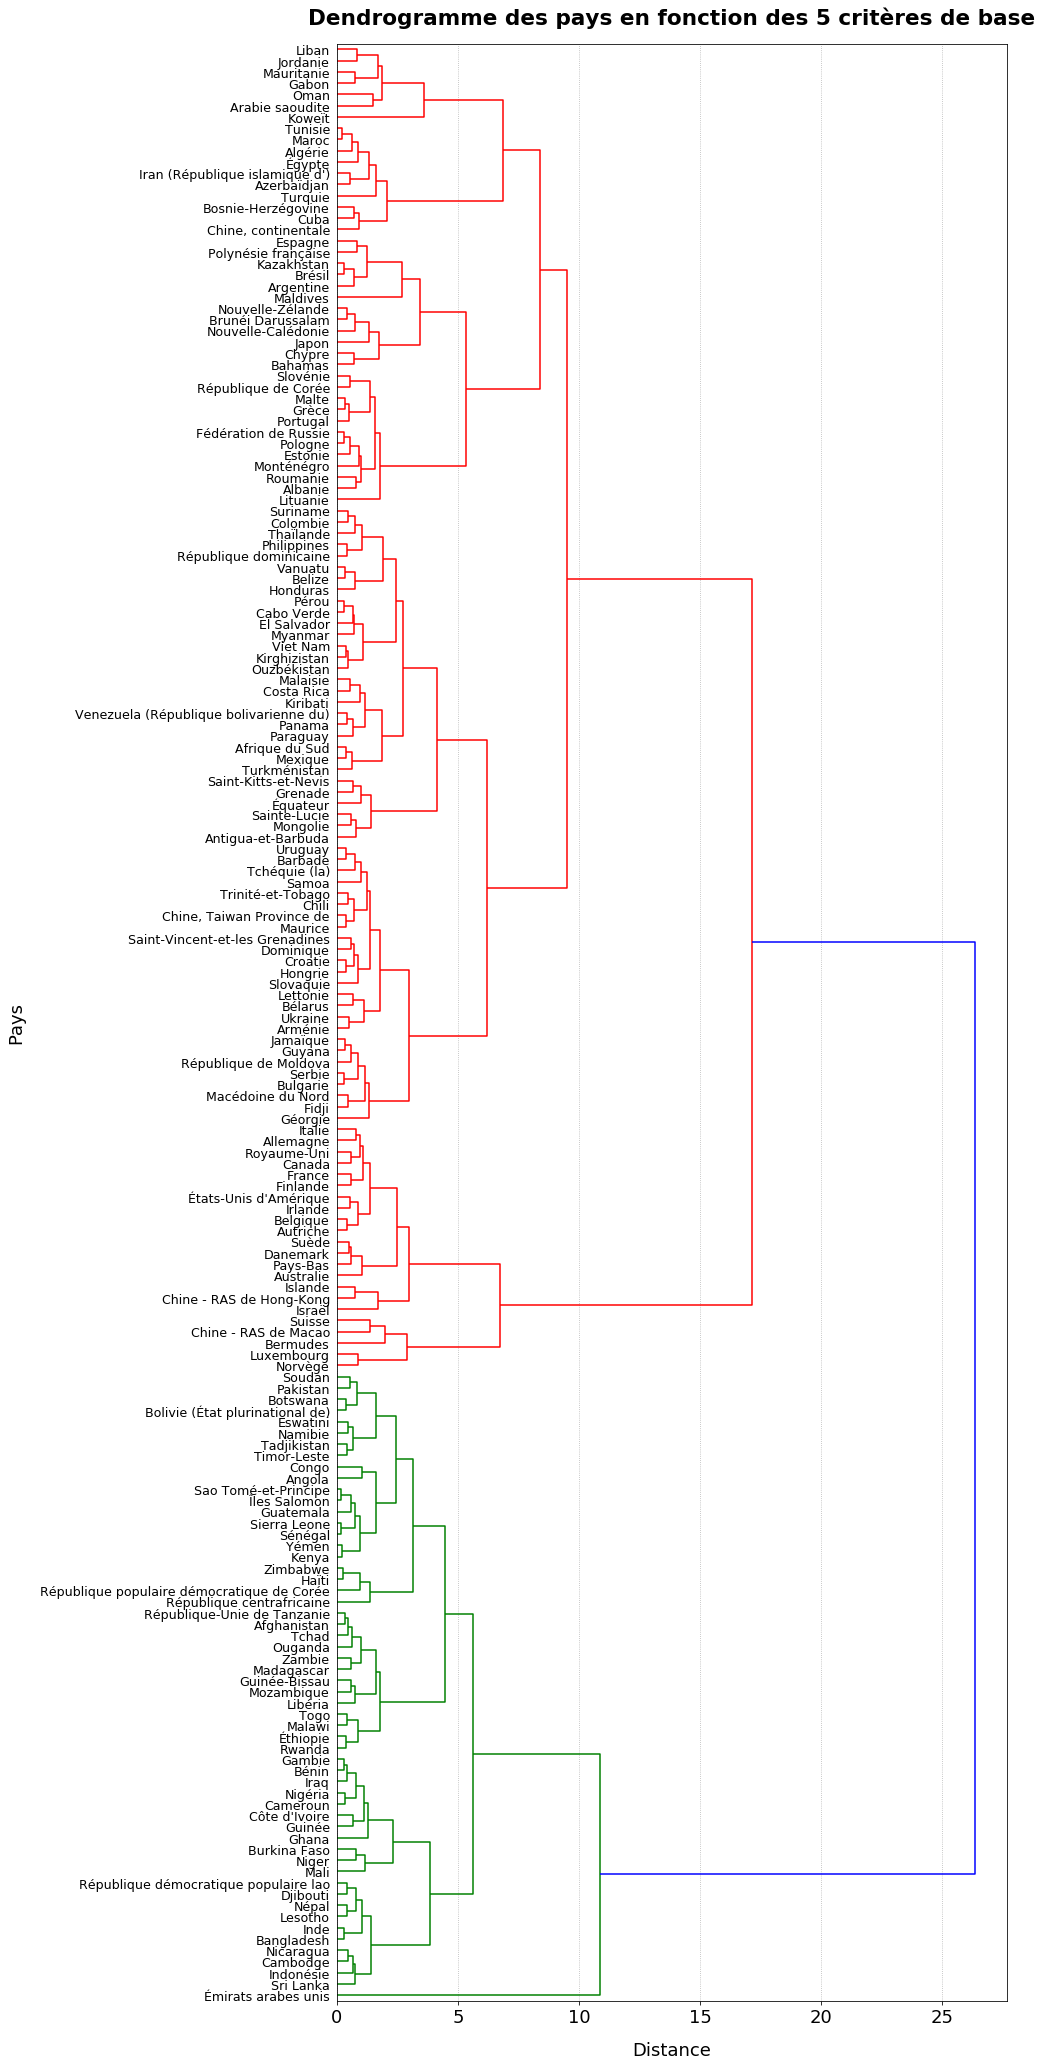

In [16]:
fig, ax = dendro2.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 5 critères de base", clusters_label_title="Pays", orientation='right', figsize=(12,36), mult_clusters_label_size=0.7)

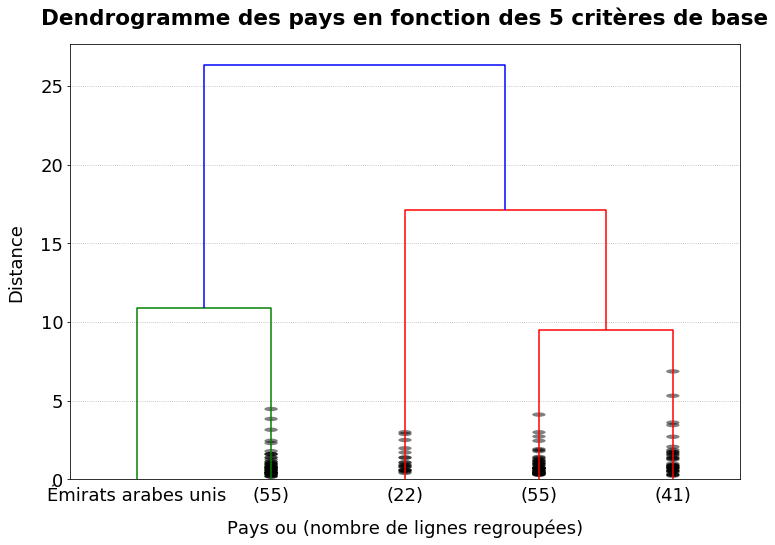

In [17]:
# je commence avec 5 clusters comme demandé dans l'énoncé
n_clusters = 5
dendro2.define_n_clusters(n_clusters)
fig, ax = dendro2.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 5 critères de base", clusters_label_title="Pays", n_clusters=n_clusters)

In [18]:
dendro2.df_centroids

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,gdp_per_capita_usd,nombre_individus
cluster 1,0.263117,0.244006,60.359273,2387.709091,1766.752939,55
cluster 2,1.406848,0.398547,104.630000,3280.000000,43315.138419,1
cluster 3,0.095452,0.623897,109.131818,3407.000000,59794.256968,22
cluster 4,0.081855,0.488574,78.688909,2824.163636,7960.089902,55
cluster 5,0.140630,0.486386,97.671463,3190.707317,17151.648786,41


<a id="2_3"></a>

### <font color=blue>2.3. Analyse des résultats</font>

Voici les caractéristiques des différents groupes de pays :  
- Le cluster 1 regroupe des pays sous-développés : le PIB par habitant est très faible, la croissance de la population est soutenue, la proportion de protéines d'origine animale est faible (moins d'un quart), les apports journaliers en protéines et en calories sont faibles. Ce groupe de pays n'est pas intéressant : le pouvoir d'achat et la consommation de viande y sont trop faibles.  
- Le cluster 2 ne comporte qu'un pays : les Emirats Arabes Unis. Il est caractérisé par une très forte progression démographique, une disponibilité alimentaire en protéines et en calories élévée, qui provient essentiellement des végétaux, et un fort pouvoir d'achat. Sa distance géographique et son climat créent des contraintes logistiques qui n'en font pas un bon pays candidat pour commencer une activité d'exportation.  
- Le cluster 3 représente les pays développés : le PIB par habitant est très élevé, la croissance de la population est faible, la majorité des protéines (plus de 60%) est d'origine animale, la disponibilité alimentaire en protéines et en calories est très élevée. Ce sont les pays les plus proches de la France. Cette similitude les rend intéressants pour une première expérience à l'exportation.  
- Le cluster 4 contient des pays en développement lent : le PIB par habitant est faible, la croissance de la population est faible, les protéines proviennent à peu près de moitié des animaux, la disponibilité alimentaire en protéines et en calories est moyenne. Le manque de dynamisme démographique et économique élimine ce groupe de pays des cibles potentielles, à cause d'un niveau de consommation et d'un pouvoir d'achat limités.  
- Le cluster 5 comporte des pays en développement dynamique : le PIB par habitant reste limité mais la croissance de la population est dynamique, la disponibilité alimentaire en protéines et en calories est élevée et est pour moitié d'origine animale. Ces pays pourraient être intéressants car leur consommation de viande est déjà développée et leur croissance est dynamique. Le frein peut être le pouvoir d'achat de leurs habitants qui est encore limité.

A la vue de ces éléments, nous avons le choix entre deux stratégies :  
- Cibler les pays développés du cluster 3, où le pouvoir d'achat est élevé et où la consommation de viande est déjà très développée. Ce groupe de pays présente l'avantage de ressembler au marché français et d'avoir un marché déjà mature. Il devrait permettre de commencer l'internationalisation avec des pays proches culturellement et géographiquement (à vérifier avec la liste des pays).
- Se focaliser sur les pays en voie de développement à fort potentiel du cluster 5 : la croissance de la population assure le développement du marché, la part des protéines d'origine animale et le pouvoir d'achat devraient continuer à progresser avec le développement économique. Toutefois, ce groupe de pays présente plus de risques commerciaux et politiques. Il devrait être plus éloigné géographiquement, ce qui peut induire des coûts de logistique (emballage, transport, stockage) plus élevés. Enfin, le marché n'est pas encore mature et les prix de vente risquent d'y être moins élevés. Ce n'est pas le groupe de pays idéal pour commencer une internationalisation. Par contre, il est intéressant pour développer l'internationalisation dans un deuxième temps.

Je vérifie les pays inclus dans ces deux clusters.

In [19]:
analysis = dendro2.df_data_clusters.copy()
analysis[analysis.cluster == 3].index

Index(['Australie', 'Autriche', 'Bermudes', 'Canada', 'Danemark', 'Finlande',
       'France', 'Allemagne', 'Chine - RAS de Hong-Kong', 'Islande', 'Irlande',
       'Israël', 'Italie', 'Chine - RAS de Macao', 'Pays-Bas', 'Norvège',
       'Suède', 'Suisse', 'Royaume-Uni', 'États-Unis d'Amérique', 'Belgique',
       'Luxembourg'],
      dtype='object', name='country')

In [20]:
analysis[analysis.cluster == 5].index

Index(['Albanie', 'Algérie', 'Argentine', 'Bahamas', 'Brésil',
       'Brunéi Darussalam', 'Chine, continentale', 'Cuba', 'Chypre',
       'Azerbaïdjan', 'Égypte', 'Estonie', 'Polynésie française', 'Gabon',
       'Bosnie-Herzégovine', 'Grèce', 'Iran (République islamique d')',
       'Kazakhstan', 'Japon', 'Jordanie', 'République de Corée', 'Koweït',
       'Liban', 'Lituanie', 'Maldives', 'Malte', 'Mauritanie', 'Maroc',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Pologne', 'Portugal',
       'Roumanie', 'Fédération de Russie', 'Arabie saoudite', 'Slovénie',
       'Espagne', 'Oman', 'Tunisie', 'Turquie', 'Monténégro'],
      dtype='object', name='country')

La liste des pays conforte mon analyse et me pousse à me concentrer sur le groupe 3, qui sont les pays les plus similaires à notre marché domestique et les plus proches géographiquement, deux critères facilitant lors de la création d'une activité d'exportation.

Je regarde si les pays sont regroupés majoritairement par zones géographiques. J'ajoute une colonne country_zone à mon dataframe analysis qui indique à quelle zone géographique le pays appartient. Je retiens 5 zones géographiques définies par la FAO : Afrique, Amérique du Nord et Europe, Amérique Latine et Caraïbes, Asie et Océanie.

In [21]:
zones_geo = pd.read_csv("projet05_liste_groupe_pays_FAO.csv")
analysis = pd.merge(analysis, zones_geo[["country","group_name"]], how='left', on="country")
temp = pd.pivot_table(data=analysis[["cluster","group_name","croissance_population"]], index="cluster", columns="group_name", aggfunc='count')
temp.fillna(0)

croissance_population                              \
group_name               Afrique Amérique Latine et Caraïbes   
cluster                                                        
1                           36.0                         4.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            3.0                        25.0   
5                            6.0                         4.0   

                                                     
group_name Amérique du Nord et Europe  Asie Océanie  
cluster                                              
1                                 0.0  14.0     1.0  
2                                 0.0   1.0     0.0  
3                                18.0   3.0     1.0  
4                                10.0  11.0     4.0  
5                                13.0  14.0     3.0

Les pays africains se concentrent essentiellement dans le cluster 1. Les pays d'Amérique Latine et Caraïbes et les pays d'Océanie sont surtout représentés dans le cluster 4. Les pays développés d'Amérique du Nord et d'Europe sont concentrés dans le cluster 3. Les pays en développement avancé d'Europe (essentiellement Europe de l'Est) et d'Asie se partagent entre les clusters 4 et 5. Les pays sous-développés d'Asie se retouvent dans le cluster 1 avec les pays africains.

Ce tableau conforte mon analyse de proximité culturelle et géographique du cluster 3, essentiellement composé de pays d'Amérique du Nord et d'Europe. Je me concentre sur ce groupe de pays, et j'étudie leur distance avec la France.

In [22]:
countries_selection = analysis[analysis.cluster == 3].copy()
temp = pd.DataFrame({"country": data_secondaire_2013.country, "distance": data_secondaire_2013.distance_capitale_paris, "population": data_secondaire_2013.total_population})
countries_selection = pd.merge(countries_selection, temp, how='left', on="country")
countries_selection.sort_values(by="distance")

,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,gdp_per_capita_usd,cluster,group_name,distance,population
6,France,0.055653,0.627431,110.53,3482.0,42532.438874,3,Amérique du Nord et Europe,0.0,63919917.0
20,Belgique,0.070302,0.583534,99.60,3733.0,46713.438406,3,Amérique du Nord et Europe,262.0,11151512.0
21,Luxembourg,0.217738,0.633298,113.88,3539.0,113341.237463,3,Amérique du Nord et Europe,288.0,544721.0
18,Royaume-Uni,0.084942,0.564674,103.21,3424.0,42597.737474,3,Amérique du Nord et Europe,342.0,64641110.0
14,Pays-Bas,0.039427,0.678153,111.73,3228.0,52074.773952,3,Amérique du Nord et Europe,430.0,16839699.0
17,Suisse,0.115304,0.642136,93.08,3391.0,84659.015399,3,Amérique du Nord et Europe,435.0,8132674.0
10,Irlande,0.156171,0.589219,110.01,3599.0,51023.486060,3,Amérique du Nord et Europe,780.0,4681967.0
7,Allemagne,-0.005158,0.605178,101.59,3498.0,46176.177749,3,Amérique du Nord et Europe,879.0,81265139.0
4,Danemark,0.046566,0.641198,108.89,3367.0,60942.805627,3,Amérique du Nord et Europe,1028.0,5637817.0
1,Autriche,0.049161,0.591846,106.21,3768.0,50137.519579,3,Amérique du Nord et Europe,1036.0,8577782.0


Ma courte liste de pays à cibler se résume aux huit premiers pays de cette liste, excepté la France qui est notre marché domestique et l'Irlande pour des raisons logistiques (ce pays n'est pas accessible par voie terrestre). Je ne donne pas non plus la priorité au Royaume-Uni qui n'appartient pas à l'espace Schengen, ce qui peut compliquer la circulation des personnes, et dont la situation future est incertaine avec le Brexit.  
  
**Je cible donc 5 pays : la Belgique, le Luxembourg, les Pays-Bas, la Suisse et l'Allemagne.**  
Ces pays présentent l'avantage d'être tous accessibles par voie terrestre, d'offrir différentes tailles de marché et d'appartenir à l'espace Schengen.

<a id="2_4"></a>

### <font color=blue>2.4. Visualisation des résultats par une ACP</font>

Je prépare maintenant la visualisation de mes partitions grâce à une ACP

In [23]:
data_acp = dendro2.data
n_comp = 4
acp2 = sfca.ACP(data_acp, n_comp)

Je commence par tracer l'éboulis des valeurs propres pour vérifier le pourcentage d'inertie expliqué par les deux premières composantes principales.

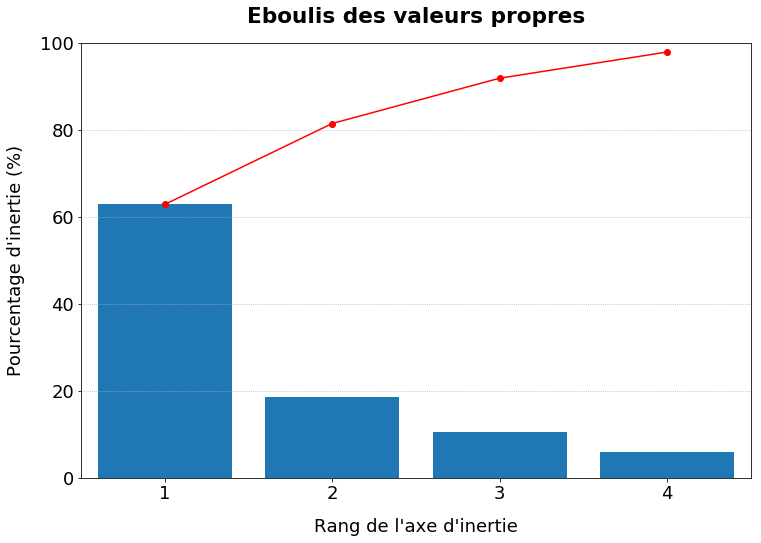

In [24]:
fig, ax = acp2.graphique_scree_plot()

Les deux premières composantes principales expliquent 80% de l'inertie. Elles semblent donc très pertinentes.

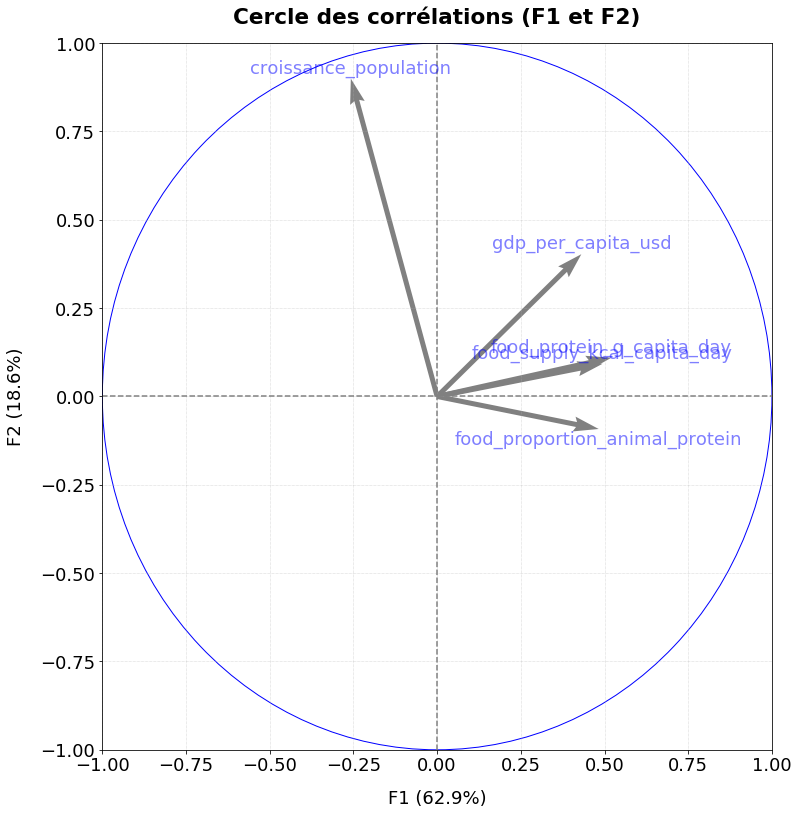

In [25]:
fig, ax = acp2.graphique_correlation_circles()
#plt.savefig("dendro1_cercle_correl.png")
#plt.show()

Le premier axe d'inertie, qui explique plus de 60% de l'inertie, est moyennement corrélé (environ à 50%) avec la disponibilité alimentaire, aussi bien en protéines qu'en calories, et avec la proportion des protéines d'origine animale. Chacune de ces trois variables est moyennement représentée par cette composante principale. Mais elles touchent toutes à la même notion de développement alimentaire du pays. Cet axe d'inertie est aussi impacté par le PIB par habitant.  
Plus un pays est développé, plus sa disponibilité alimentaire est élevée, et plus la proportion des protéines d'origine animale est élevée. Donc le premier axe d'inertie représente le développement économique et alimentaire du pays.  
  
Le second axe d'inertie explique environ 20% de l'inertie. Il est fortement corrélé avec la croissance de la population, mais est aussi influencé par le PIB par habitant. La deuxième composante principale est donc le potentiel de croissance du marché du pays.  
  
Le PIB par habitant est un peu corrélé aux deux premiers axes d'inertie (à environ 40% dans les deux cas). Il représente le développement économique du pays et doit être mieux représenté par un autre axe d'inertie (le troisième ou le quatrième). Je vérifie cette hypothèse en tracant le cercle de corrélation pour les 3ème et 4ème axes.

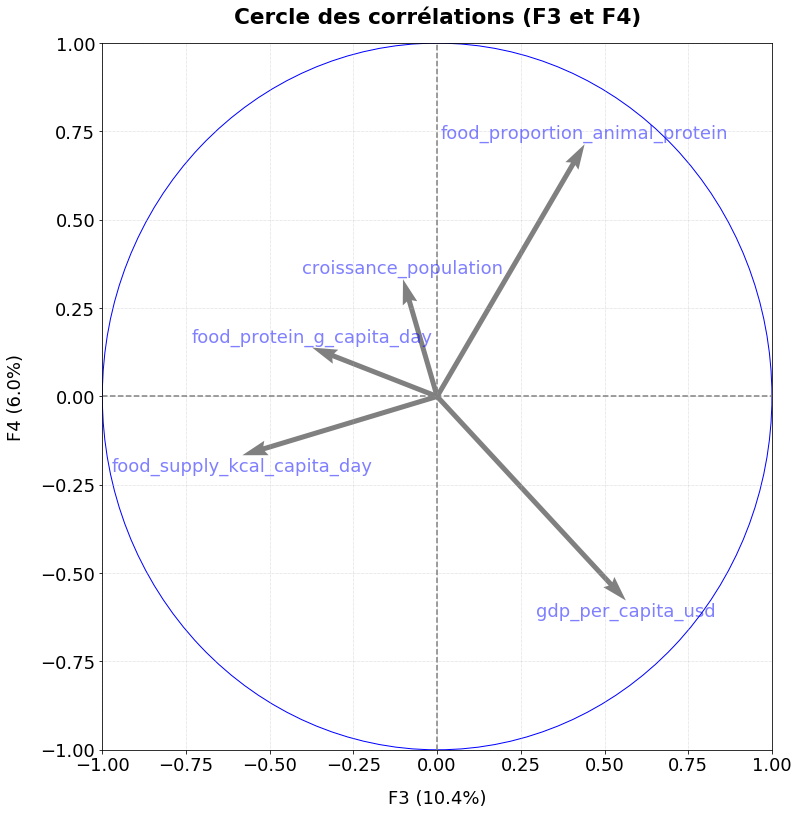

In [26]:
fig, ax = acp2.graphique_correlation_circles(axis_ranks=(2,3))

Les troisième et quatrième axes d'inertie sont plus difficiles à interpréter. Mais on constate que le PIB par habitant est mieux représenté sur ces 2 axes car la flèche est plus longue, et qu'il est plus corrélé à ces deux axes qu'aux deux premiers axes d'inertie.

J'effectue la projection des pays sur le premier plan factoriel, afin de voir si mes partitions se distinguent bien.

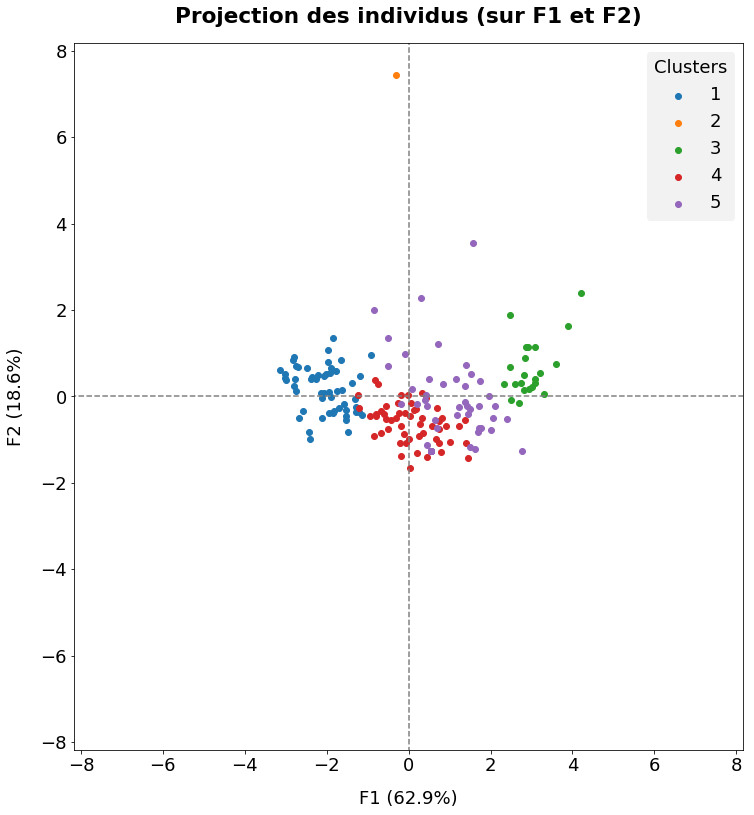

In [27]:
fig, ax = acp2.graphique_factorial_planes(illustrative_var=dendro2.df_clusters, illustrative_legend="Clusters")

Les clusters 4 et 5 semblent assez similaires sur le premier plan factoriel.  
Le cluster 2 ne comporte qu'un pays. Ce pays est vraiment distinct de tous les autres sur le premier plan factoriel.  
Le cluster 3 correspond aux pays avec les croissances démographiques les plus fortes parmi les pays les plus développés du point de vue alimentaire.  
Le cluster 5 correspond aux pays en voie de développement dynamique. Il regroupe deux types de pays différents. D'une part, il y a des pays qui sont moyennement développés du point de vue alimentaire mais qui présentent une croissance démographique importante. D'autre part, il y a des pays qui sont plus développés du point de vue alimentaire mais qui présentent une croissance démographique nulle ou négative.  
Le cluster 1 regroupe les pays les moins développés économiquement et alimentairement (ces deux facteurs sont liés).

J'observe maintenant la position des centroïdes à la lumière des 4 premiers axes d'inertie.

In [28]:
acp2.calculate_centroids_projection(dendro2.df_clusters)

,F1 (62.9%),F2 (18.6%),F3 (10.4%),F4 (6.0%)
cluster 1,-2.046667,0.175616,0.088355,-0.220531
cluster 2,-0.308552,7.429870,-1.073875,1.534637
cluster 3,2.976143,0.668245,0.529771,-0.522971
cluster 4,0.064977,-0.619331,0.110976,0.297046
cluster 5,1.068936,0.055442,-0.525470,0.140546


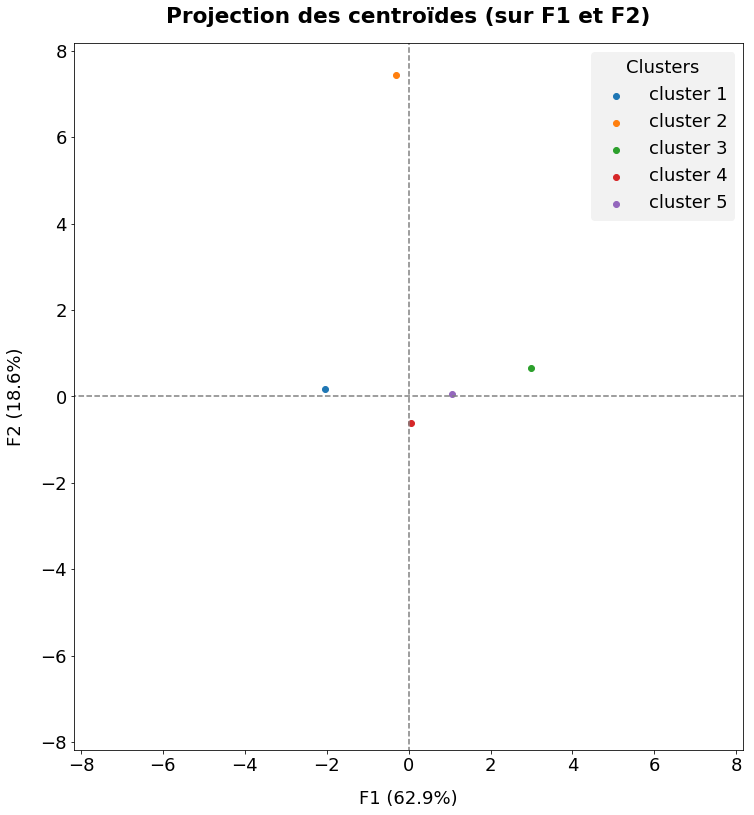

In [29]:
fig, ax = acp2.graphique_centroids_projection(illustrative_var=acp2.df_centroids_projected.index, illustrative_legend="Clusters")

Nous avons déjà vu que les troisième et quatrième axes d'inertie sont difficiles à interpréter. Je me concentre donc sur les deux premiers axes d'inertie.  
Les pays des clusters 3 et 5 ont les deux valeurs les plus élevées pour F1 : ce sont les pays les plus développés d'un point de vue économqie et alimentaire, avec une avance assez nette de développement pour les pays du cluster 3.  
La différence entre les deux groupes porte sur le dynamisme démographique et le potentiel de croissance du marché : alors que la valeur de F2 est assez élevée pour le cluster 3, elle est faible pour le cluster 5. En moyenne, les pays du cluster 3 présentent un potentiel de croissance supérieur aux pays du cluster 5. Cette conclusion est à modérer par notre observation de la projection sur le premier plan factoriel où deux groupes de pays se distinguent parmi les pays du cluster 5.

**Les observations effectuées sur le premier plan factoriel me confortent dans le choix des pays cibles parmi les pays du cluster 3.**

---

<a id="3_0"></a>

## <font color=blue>3. Analyse de base : 5 variables - 6 clusters</font>

Comme vu précédemment, et comme le rappelle le graphique ci-dessous, réaliser la classification avec 6 clusters est plus pertinent qu'avec 5 clusters. Je peux également réaliser une classification avec 11 clusters pour conserver toutes les séparations d'une distance supérieure à 5.  
**Je recommence mon analyse avec 6 clusters.**

<a id="3_1"></a>

### <font color=blue>3.1. Classification hiérarchique</font>

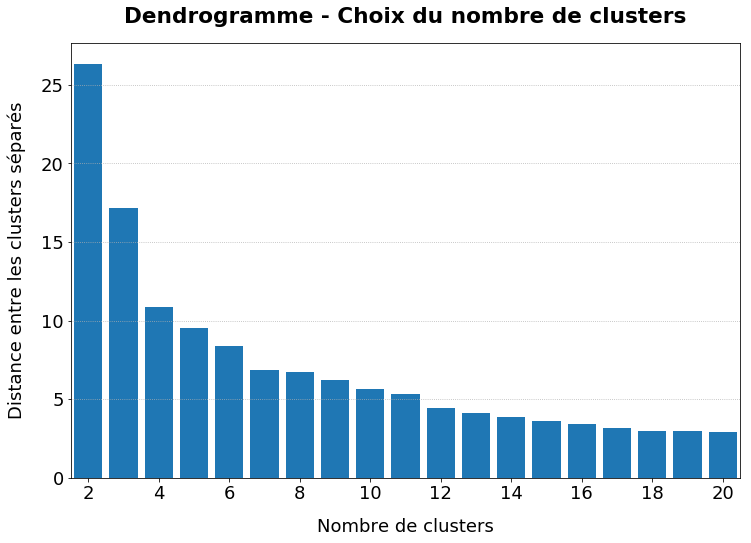

In [30]:
fig, ax = dendro2.graphique_choix_nclusters(20)
#plt.savefig("5variables_choix6clusters.png")
#plt.show()

Text(0.5, 0, ' ')

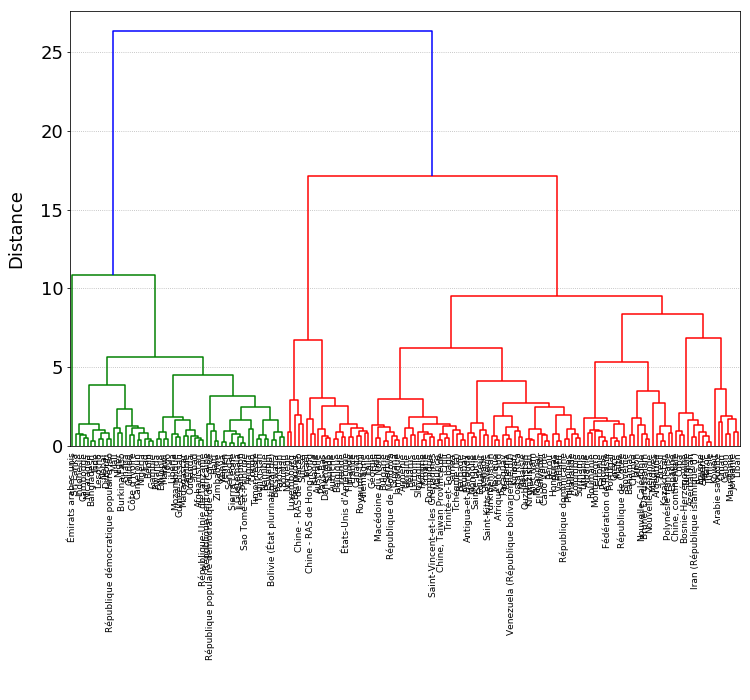

In [31]:
# vue générale sans titre et sans labels pour illustrer le concept de dendrogramme dans la présentation
fig, ax = dendro2.graphique_dendrogramme(title="", clusters_label_title="", orientation='top', figsize=(12,8), mult_clusters_label_size=0.5)
ax.set_xlabel(" ")
#plt.savefig("illustration_dendro.png")
#plt.show()

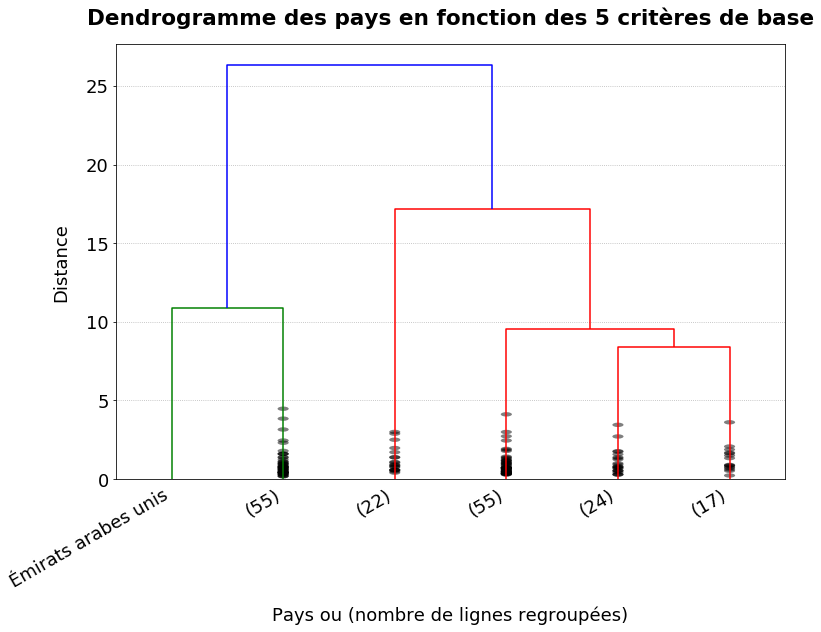

In [32]:
dendro3 = sfca.ClassificationHierarchique(data)
n_clusters = 6
dendro3.define_n_clusters(n_clusters)
fig, ax = dendro3.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 5 critères de base", clusters_label_title="Pays", n_clusters=n_clusters, label_rotation=30)
#plt.savefig("dendro1_zoom_6clusters.png")
#plt.show()

In [33]:
dendro3.df_centroids

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,gdp_per_capita_usd,nombre_individus
cluster 1,0.263117,0.244006,60.359273,2387.709091,1766.752939,55
cluster 2,1.406848,0.398547,104.630000,3280.000000,43315.138419,1
cluster 3,0.095452,0.623897,109.131818,3407.000000,59794.256968,22
cluster 4,0.081855,0.488574,78.688909,2824.163636,7960.089902,55
cluster 5,0.061491,0.575259,101.030833,3162.208333,21777.554342,24
cluster 6,0.252356,0.360917,92.928824,3230.941176,10620.958590,17


<a id="3_2"></a>

### <font color=blue>3.2. Analyse des résultats</font>

Je remarque que le cluster 5 a été partagé en deux clusters 5 et 6, qui permet une analyse plus fine.  
Le cluster 5 comporte les pays développés un peu moins avancés économiquement et alimentairement mais avec une stagnation de leur population. Ils présentent un mode de vie assez occidental : disponibilité alimentaire et proportion de protéines d'origine animale élevées. Ils possèdent un potentiel de croissance si leur niveau de vie et leur pouvoir d'achat croît pour converger vers celui des autres pays développés.  
Le cluster 6 regroupe des pays en voie de développement moyennement avancés sur le plan économique (PIB par habitant modéré), qui consomment moins de nourriture animale et avec une croissance démographique soutenue.

A la vue de ces éléments, nous avons le choix entre deux stratégies :  
- Cibler les pays développés du cluster 3, où le pouvoir d'achat est élevé et où la consommation de viande est déjà très développée. Ce groupe de pays présente l'avantage de ressembler au marché français et d'avoir un marché déjà mature. Il devrait permettre de commencer l'internationalisation avec des pays proches culturellement et géographiquement (à vérifier avec la liste des pays).
- Se focaliser sur les pays du cluster 5 : le PIB assez élevé et le développement alimentaire proche du nôtre assurent des débouchés immédiats. Ce sont des pays qui peuvent servir de relais de croissance à court terme à une stratégie d'internationalisation déjà implantée.

**Ces observations ne changent pas mes conclusions précédentes quant au choix de mes 5 pays cibles.**  
  
J'analyse les zones géographiques par cluster, puis je visualise la projection des individus sur le premier plan factoriel.

In [34]:
analysis = dendro3.df_data_clusters.copy()
analysis = pd.merge(analysis, zones_geo[["country","group_name"]], how='left', on="country")
temp = pd.pivot_table(data=analysis[["cluster","group_name","croissance_population"]], index="cluster", columns="group_name", aggfunc='count')
temp.fillna(0)

croissance_population                              \
group_name               Afrique Amérique Latine et Caraïbes   
cluster                                                        
1                           36.0                         4.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            3.0                        25.0   
5                            0.0                         3.0   
6                            6.0                         1.0   

                                                     
group_name Amérique du Nord et Europe  Asie Océanie  
cluster                                              
1                                 0.0  14.0     1.0  
2                                 0.0   1.0     0.0  
3                                18.0   3.0     1.0  
4                                10.0  11.0     4.0  
5                                12.0   6.0     3.0  
6                                 1.0   8.0     0.0

<a id="3_3"></a>

### <font color=blue>3.3. Visualisation des résultats par une ACP</font>

In [35]:
data_acp = dendro3.data
n_comp = 4
acp3 = sfca.ACP(data_acp, n_comp)

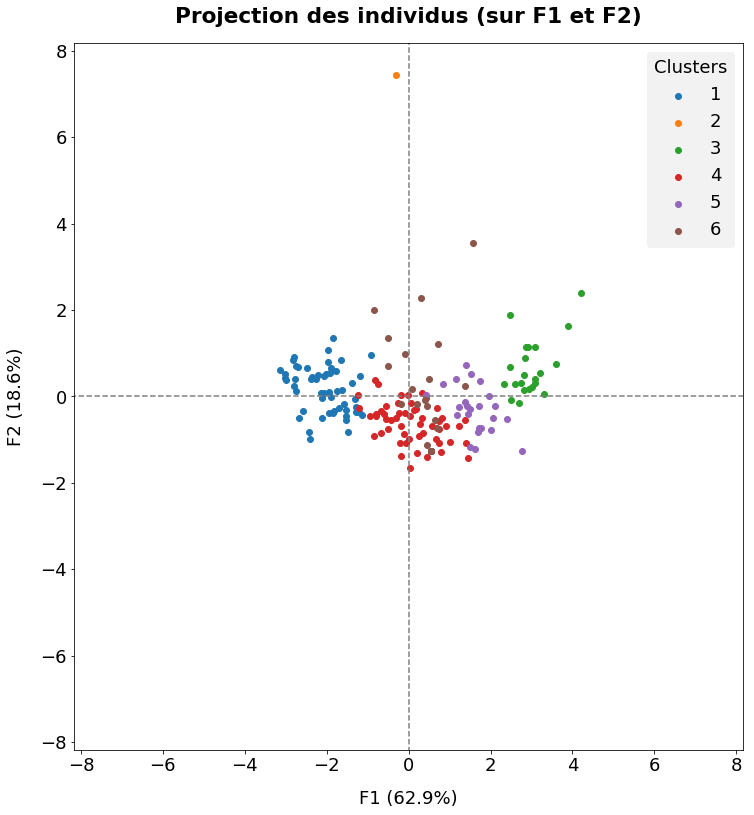

In [36]:
fig, ax = acp3.graphique_factorial_planes(illustrative_var=dendro3.df_clusters, illustrative_legend="Clusters")
#plt.savefig("dendro1_projection_individus.png")
#plt.show()

Le cluster 2 ne comporte qu'un pays : les Emirats Arabes Unis. Ce pays est vraiment distinct de tous les autres sur le premier plan factoriel.  
Le cluster 3 correspond aux pays avec les croissances démographiques les plus fortes parmi les pays les plus développés du point de vue alimentaire.  
Le cluster 5 correspond aux pays développés un peu moins avancés et qui présentent une croissance démographique faible ou nulle.  
Les clusters 4 et 6 comprennent des pays en voie de développement. Ils se distinguent surtout sur le deuxième axe d'inertie, à savoir leur dynamisme démographique et leur potentiel de croissance, qui est à la faveur des pays du cluster 6.  
Le cluster 1 regroupe les pays sous-développés économiquement et alimentairement (ces deux facteurs sont liés).

Je regarde la répartition des centroïdes.

In [37]:
acp3.calculate_centroids_projection(dendro3.df_clusters)

,F1 (62.9%),F2 (18.6%),F3 (10.4%),F4 (6.0%)
cluster 1,-2.046667,0.175616,0.088355,-0.220531
cluster 2,-0.308552,7.429870,-1.073875,1.534637
cluster 3,2.976143,0.668245,0.529771,-0.522971
cluster 4,0.064977,-0.619331,0.110976,0.297046
cluster 5,1.607801,-0.316199,-0.133959,0.284980
cluster 6,0.308185,0.580110,-1.078191,-0.063361


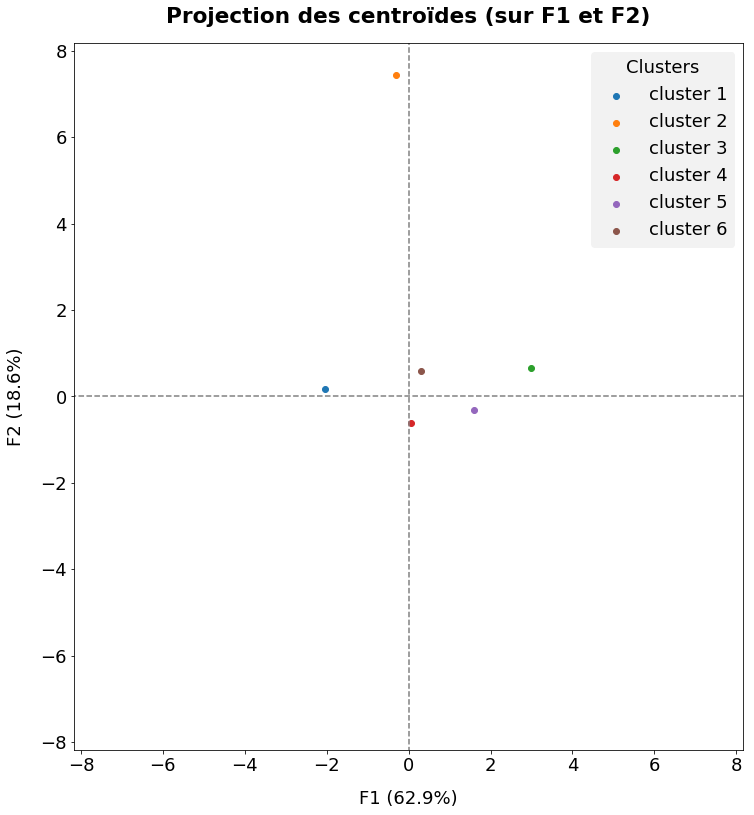

In [38]:
fig, ax = acp3.graphique_centroids_projection(illustrative_var=acp3.df_centroids_projected.index, illustrative_legend="Clusters")
#plt.savefig("dendro1_projection_centroids.png")
#plt.show()

Ces graphiques et données confirment mes analyses précédentes.

---

<a id="4_0"></a>

## <font color=blue>4. Analyse de base : 5 variables - 11 clusters</font>

Je réalise la même analyse avec une classification sur 11 clusters.

<a id="4_1"></a>

### <font color=blue>4.1. Classification hiérarchique</font>

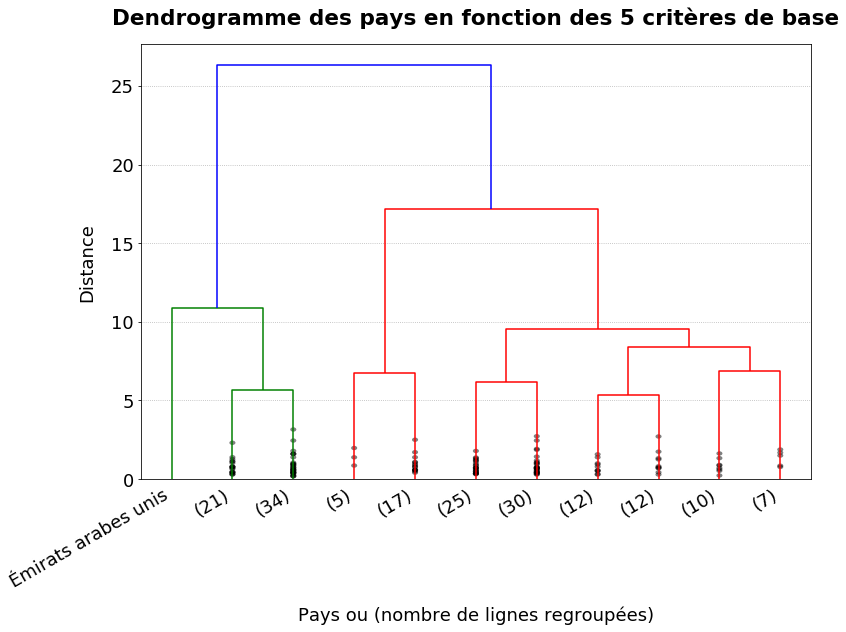

In [39]:
dendro4 = sfca.ClassificationHierarchique(data)
n_clusters = 11
dendro4.define_n_clusters(n_clusters)
fig, ax = dendro4.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 5 critères de base", clusters_label_title="Pays", n_clusters=n_clusters, label_rotation=30)

In [40]:
dendro4.df_centroids

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,gdp_per_capita_usd,nombre_individus
cluster 1,0.236177,0.217487,66.598095,2633.380952,1736.741697,21
cluster 2,0.279756,0.260385,56.505882,2235.970588,1785.289294,34
cluster 3,1.406848,0.398547,104.630000,3280.000000,43315.138419,1
cluster 4,0.132610,0.635732,100.698000,3200.400000,96120.931555,5
cluster 5,0.084523,0.620416,111.612353,3467.764706,49109.940914,17
cluster 6,0.002648,0.507619,83.632400,2972.040000,9809.109406,25
cluster 7,0.147862,0.472703,74.569333,2700.933333,6419.240315,30
cluster 8,-0.013922,0.540147,106.801667,3356.750000,16764.331436,12
cluster 9,0.136904,0.610371,95.260000,2967.666667,26790.777247,12
cluster 10,0.106046,0.308241,96.077000,3315.700000,6200.568638,10


<a id="4_2"></a>

### <font color=blue>4.2. Analyse des résultats</font>

Pour commencer, j'élimine les clusters :  
- clusters 1, 2, 6, 7 et 10 : le développement économique y est trop faible (PIB par habitant inférieur à 10 000 USD). De plus, la proportion de protéines d'origine animale est inférieure à 45% pour tous ces clusters sauf le 6.  
- cluster 8 : le manque de dynamisme démographique est un handicap pour ces pays.  
- cluster 3 et 11 : la proportion de protéines d'origine animale y reste trop modérée (moins de 45%).  
  
Il reste donc les pays des clusters :  
- cluster 9 : ces pays présentent un développement économique déjà avancé et consomment une forte proportion de protéines d'origine animale, ce qui laisse penser qu'ils ont adopté un mode de vie occidentalisé. Ils présentent une croissance de la population intéressante. La disponibilité alimentaire y reste moyennement élevée, notamment en rapport au miveau du PIB par habitant, ce qui offre de bonnes perspectives de croissance.  
- les clusters 4 et 5, qui regroupent les pays développés de l'ancien cluster 3, parmi lequel nous avons choisi nos pays cibles. Le cluster 4 comprend les cinq pays les plus riches.

In [41]:
dendro4.df_clusters[dendro4.df_clusters.cluster == 4].index

Index(['Bermudes', 'Chine - RAS de Macao', 'Norvège', 'Suisse', 'Luxembourg'], dtype='object', name='country')

In [42]:
dendro4.df_clusters[dendro4.df_clusters.cluster == 5].index

Index(['Australie', 'Autriche', 'Canada', 'Danemark', 'Finlande', 'France',
       'Allemagne', 'Chine - RAS de Hong-Kong', 'Islande', 'Irlande', 'Israël',
       'Italie', 'Pays-Bas', 'Suède', 'Royaume-Uni', 'États-Unis d'Amérique',
       'Belgique'],
      dtype='object', name='country')

In [43]:
dendro4.df_clusters[dendro4.df_clusters.cluster == 9].index

Index(['Argentine', 'Bahamas', 'Brésil', 'Brunéi Darussalam', 'Chypre',
       'Polynésie française', 'Kazakhstan', 'Japon', 'Maldives',
       'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Espagne'],
      dtype='object', name='country')

Les pays du cluster 9 sont très éloignés géographiquement, mis à part l'Espagne. Malgré leur profil intéressant, je ne peux pas les inclure dans mes pays cibles à cause des coûts et difficultés logistiques que cette distance implique.  
**Mes 5 pays cibles restent inchangés et proviennent des clusters 4 et 5 : la Belgique, le Luxembourg, les Pays-Bas, la Suisse et l'Allemagne.**

<a id="4_3"></a>

### <font color=blue>4.3. Visualisation des résultats par une ACP</font>

In [44]:
data_acp = dendro4.data
n_comp = 4
acp4 = sfca.ACP(data_acp, n_comp)

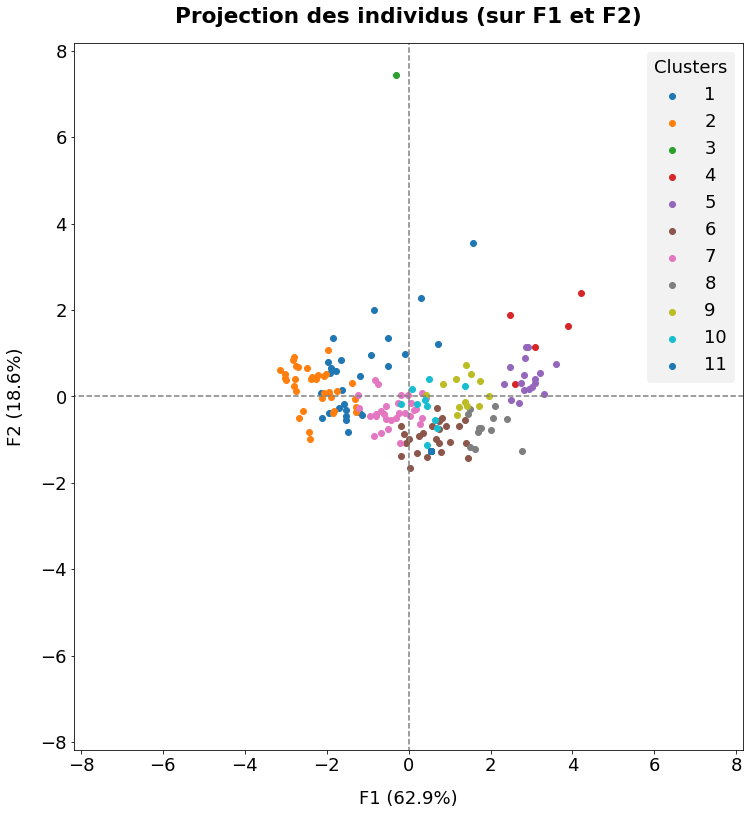

In [45]:
fig, ax = acp4.graphique_factorial_planes(illustrative_var=dendro4.df_clusters, illustrative_legend="Clusters")

---

<a id="5_0"></a>

## <font color=blue>5. Sauvegarde des données</font>

Je sauvegarde mes données avec les clusters issus de mes classifications pour réaliser des tests sur les variables.

In [46]:
dendro2.df_data_clusters.to_csv("5variables_5clusters.csv", index=True)
dendro3.df_data_clusters.to_csv("5variables_6clusters.csv", index=True)
dendro4.df_data_clusters.to_csv("5variables_11clusters.csv", index=True)